**Linear Regression**

- Linear Regression is a simple approach to supervised learning. It assumes that the dependance of the response(endogenous) variable $Y$ on $X_1,X_2,...X_p$ is linear.
- True Regression functions are never linear.
- Although it may seem overly simplistic, linear regression is extremely useful both conceptually and practically.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Advertising.csv')

In [3]:
data.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [4]:
data.drop('Unnamed: 0',1,inplace=True)
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


**Linear Regression for Advertising Data**

Questions we might ask:
- Is there a relationship between advertising budget and sales?
- How strong is the relationship between advertising budget and sales?
- Which media conntributes to the sales?
- How accurate can we predict future sales?
- Is the relationship linear?
- Is there a synergy among the advertising data?

**Simple Linear Regression using a Single Predictor X.**
- We assume a model ,

  $Y = \beta _0+\beta _1X+\epsilon,$

  where $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and the *slope*, also know as the *coeefficients* or *parameters* and $\epsilon$ is the error term

- Given some estimates of $\hat \beta_0$ and $\hat\beta_1$ for the model coefficients, we predict the future sales using,

  $\hat y = \hat\beta_0+\hat\beta_1x$

  where $\hat y$ indicates a prediction of $Y$ on the basis of $X = x$.
  The hat symbol ($\hat y$) denotes an estimated value.

In [0]:
from statsmodels.formula.api import ols

In [0]:
# TV Model
model_tv = ols('Sales ~ TV',data=data).fit()
tv_pred = model_tv.predict(data['TV'])

# TV Model
model_radio = ols('Sales ~ Radio',data=data).fit()
radio_pred = model_radio.predict(data['Radio'])

# TV Model
model_np = ols('Sales ~ Newspaper',data=data).fit()
np_pred = model_np.predict(data['Newspaper'])

[]

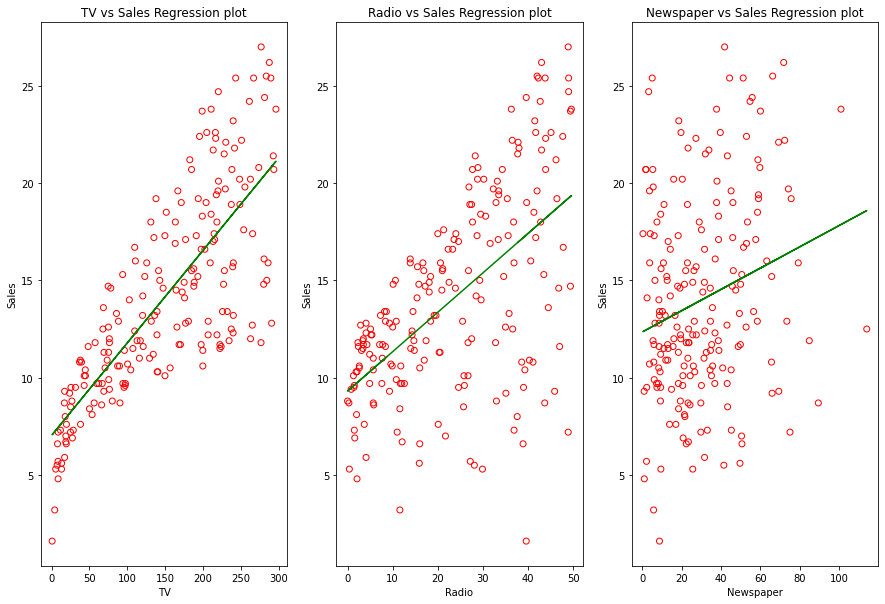

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,10))

# TV vs Sales
ax[0].scatter(data['TV'],data['Sales'],facecolors='None',edgecolor='r')
ax[0].plot(data['TV'],tv_pred,'g')
ax[0].set_title('TV vs Sales Regression plot')
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')

# Radio vs Sales
ax[1].scatter(data['Radio'],data['Sales'],facecolors='None',edgecolor='r')
ax[1].plot(data['Radio'],radio_pred,c='g')
ax[1].set_title('Radio vs Sales Regression plot')
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')

# Newspaper vs Sales
ax[2].scatter(data['Newspaper'],data['Sales'],facecolors='None',edgecolor='r')
ax[2].plot(data['Newspaper'],np_pred,c='g')
ax[2].set_title('Newspaper vs Sales Regression plot')
ax[2].set_xlabel('Newspaper')
ax[2].set_ylabel('Sales')

plt.plot()

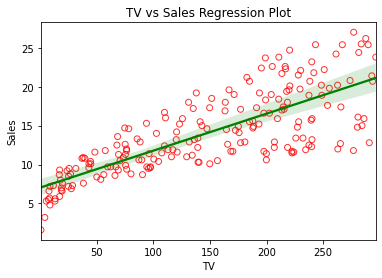

In [8]:
sns.regplot(data['TV'],data['Sales'],color='g',scatter_kws={'facecolor':'None','edgecolor':'r'},order=1,ci=100)
plt.title('TV vs Sales Regression Plot')
plt.show()

**Estimation of parameters by Least Squares.**
- Let $\hat y_i = \hat\beta_0+\hat\beta_1x_i$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_i = y_i-\hat y_i$ represents the $i$th *residual*. 
- We define the *residual sum of squares*(**RSS**) as

  **RSS** = $e_1^2+e_2^2+...+e_n^2$,

  or equivalently as,

  **RSS** = $(y_1 - \hat y_1)^2+(y_2 - \hat y_2)^2+...+(y_n - \hat y_n)^2$

- The Least Squares approach chooses $\hat\beta_0$ and $\hat\beta_1$ to minimize the RSS. The minimizing values can be shown to be

  $\hat\beta_1 = \frac {\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i - \bar x)^2}$

  $\hat\beta_0 = \bar y - \hat\beta_1\bar x$,

  where $\bar y = \frac{1}{n}\sum_{i=1}^n y_i$ and $\bar x = \frac{1}{n}\sum_{i=1}^n x_i$ are the sample means.

**Assessing the Accuracy of the Coefficients Estimates**
- The standard error of an Estimator reflects how it varies under repeated sampling. We have,

  $SE(\hat\beta_1)^2 = \frac {\sigma^2}{\sum_{i=1}^n(x_i-\bar x)^2}$,

  $SE(\hat\beta_0)^2 = \sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_{i=1}^n(x_i-\bar x)^2}]$,

  where $\sigma^2 = Var(\epsilon)$

- These Standard Error can be used to compute confidence intervals. A $95$% confidence interval is defined as the range of values such that with $95$% probability the range will contain the true unknown value of the parameter. It has the form

  $\hat\beta_1\pm2.SE(\hat\beta_1)$

- That is, there is approximately a $95$% chance that the interval 

  $[\hat\beta_1-2.SE(\hat\beta_1),\hat\beta_1+2.SE(\hat\beta_1)]$,

  will contain the true value of $\beta_1$.

**Hypothesis Testing on Coefficients**
- Standard Errors  can also be used to perform hypothesis testing on the coefficients. The most common hypothesis test involves testing the null hypothesis of,
  - $H_0:$ There is no relationship between $X$ and $Y$.
  - $H_A:$ There is some relationship between $X$ and $Y$.

- Mathematically, this corresponds to testing,
  
  $H_0:\beta_1=0$

  $H_A:\beta_1\ne0$

  since, if $\beta_1=0$, then the model reduces to $Y = \beta_0+\epsilon$ and $X$ is not associated with $Y$.

- To Test the null hypothesis, we compute the t-statistic, given by ,

  $t = \frac{\beta_1 - 0}{SE(\hat\beta_1)}$,
- This will have a t-distribution with $n-2$ degrees of freedom, assuming, $\beta_1=0$.
- Using statistical Software, it is easy to compute the probability of observing any value equal to $\left|t\right|$ or larger. We call this the probability, the $p-value$.

**Example**

In [9]:
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        13:57:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Observation:**
- $\hat\beta_1 = 0.0475$
- $SE(\hat\beta_1) = 0.003$
- $\frac{\hat\beta_1}{SE(\hat\beta_1)} = 17.668$, which is the $t-statistic$ value.
- $p-value$ is almost equal to zero, which means that TV is a significant variable.

**Assessing the Overall Accuracy of the Model**

- We compute the Residual Standard Error,

  $RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i -\hat y_i)^2}$,
  
  where, the residual sum of squares is the $RSS = \sum_{i=1}^n(y_i -\hat y_i)^2 $.

- $R^2$ measures how much of the variability of the data is captured by ***linear*** model.

- $R^2 = 1-\frac{RSS}{TSS}$, where ,

  $TSS = \sum(\bar y - y_i)^2$

  $RSS = \sum(\hat y - y_i)^2$

- TSS means the Total Sum of Square errors from the mean.

- It can be shown that in this simple linear regression setting that $R^2 = r^2$, where r is the correlation between $X$ and $Y$:

  $r = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i - \bar x)^2}\sqrt{\sum_{i=1}^n(y_i - \bar y)^2}}$.

- $R^2$ is also known as Coefficient of Determination.

In [10]:
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        13:57:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Observations:**
- $R^2$: 0.612
- F-statistic: 312.1

**Multiple Linear Regression**

- Here our model is,

  $Y = \beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon$

- We interpret $\beta_j$ as the average on Y  of a one unit increase in $X_j$, holding all the predictors fixed. In advertising example, our model becomes,

  sales $ = \beta_0+\beta_1\times$TV+$\beta_2\times$Radio+$\beta_3\times$Newspaper+$\epsilon$

**Interpretting regression coefficients**
- The Ideal Scenario is when the predictors are uncorrelated - a balanced design:
  - Each coefficient can be  estimated and tested seperatly.
  - Interpretations such as ***a unit change in $X_j$ is associated with a $\beta_j$ change in $Y$, while all other variables stay fixed***, are possible.

- Correlation among predictors cause problems:
  - The variance of all coefficients  tends to increase, sometimes dramatically.
  - Interpretation becomes hazardous -  when $X_j$ changes everything else changes as well.

- ***Claims of Causality*** should be avoided for observational data.

**The Woes of interpreting regression coefficients**

- a regression coefficient $\beta_j$ estimates the expected change in Y per unit change in $X_j$, with all other predictors held fixed. But predictors usually change together!.

**Estimation and Prediction for Multiple Regression**

- Given estimates of $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$, we can make predictions using the formula,

  $\hat y = \hat\beta_0+\hat\beta_1x_1+\hat\beta_2x_2+...+\hat\beta_px_p$.

- We estimate the $\beta_0,\beta_1,...,\beta_p$ as the values that minimize the sum of squared residuals.

  $RSS = \sum_{i=1}^n(y_i - \hat y_i)^2$

  The values $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$ that minimizes the RSS are the Multiple Least Square Regression Coeffiecients estimates.

In [0]:
model = ols('Sales ~ TV+Radio+Newspaper',data).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        13:57:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

**Observation**
- The $p-value$ of the TV and Radio are highly significant.
- The $p-value$ of newspaper is not significant.

**Correlation Matrix**

In [13]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**Observation**
- The radio and newspaper are highly correlated. This is very dangerous and may screw our results.

**Some Important Question:**
- Is atleast one of the predictors useful in predicting the response?
- Do all the predictors  help explain $Y$, or is only a subset of the predictors is useful?
- How well does the model fit the data?
- How much predictability does our model has?


**Is atleast one predictor useful?**


- For this question we can use the F-statistic,

  $F = \frac{\frac{(TSS-RSS)}{p}}{\frac{RSS}{n-p-1}}$

- We would want the F-Statistic value to be high and the $p-value$ of the F-statistic should be very low less than the $\alpha$ or 0.05

**Deciding on Important Variables**

- The most direct approach is called **all subsets** or **best subset** regression. We compute the least square fit for all subsets and then choose between them based on some criterion that balances the training error with model size.
- We can't examine all the possible models, since there are $2^p$ of them.
- We will be using an automated approach thats most commonly used.

**Forward Selection(Feature Selection Techniques)**

- Begin with null model - a model that contains intercept but no predictors
- Fit p simple linear regressions and add to null model that variable that results in lower RSS.
- Add to that variable that results in the lowest RSS among all the two-variable models.
- Continue until some stopping rule is satisfied, for example, when all the remaining variables have a p-value above some threshold.

**Backward Selection(Feature Selection Techniques)**

- Start with all the variables in the model.
- Remove the variable with the largest p-value -- that is , the variable that is the least statistically significant.
- The new (p-1) variable model is fit, and the variable with the largest p-value is removed.
- Continue till the stopping rule is reached. For Instance,we may stop when all the remaining variables have a significant p-value definied by some significant threshold.

**Other Considerations in the Regression Model**

***Qualitative Predictors***

- Some predictors are not quantitative but are qualitative, taking a discrete set of values.
-  These are also called categorical  predictors or factor variables.

In [0]:
credit_data = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Credit.csv')

In [0]:
credit_data.drop('Unnamed: 0',1,inplace=True)

In [16]:
credit_data.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


**Observation:**
- Inaddition to the 7 quantitative variables shown, there are four qualitative variables: Gender, Student, Married, Ethinicity

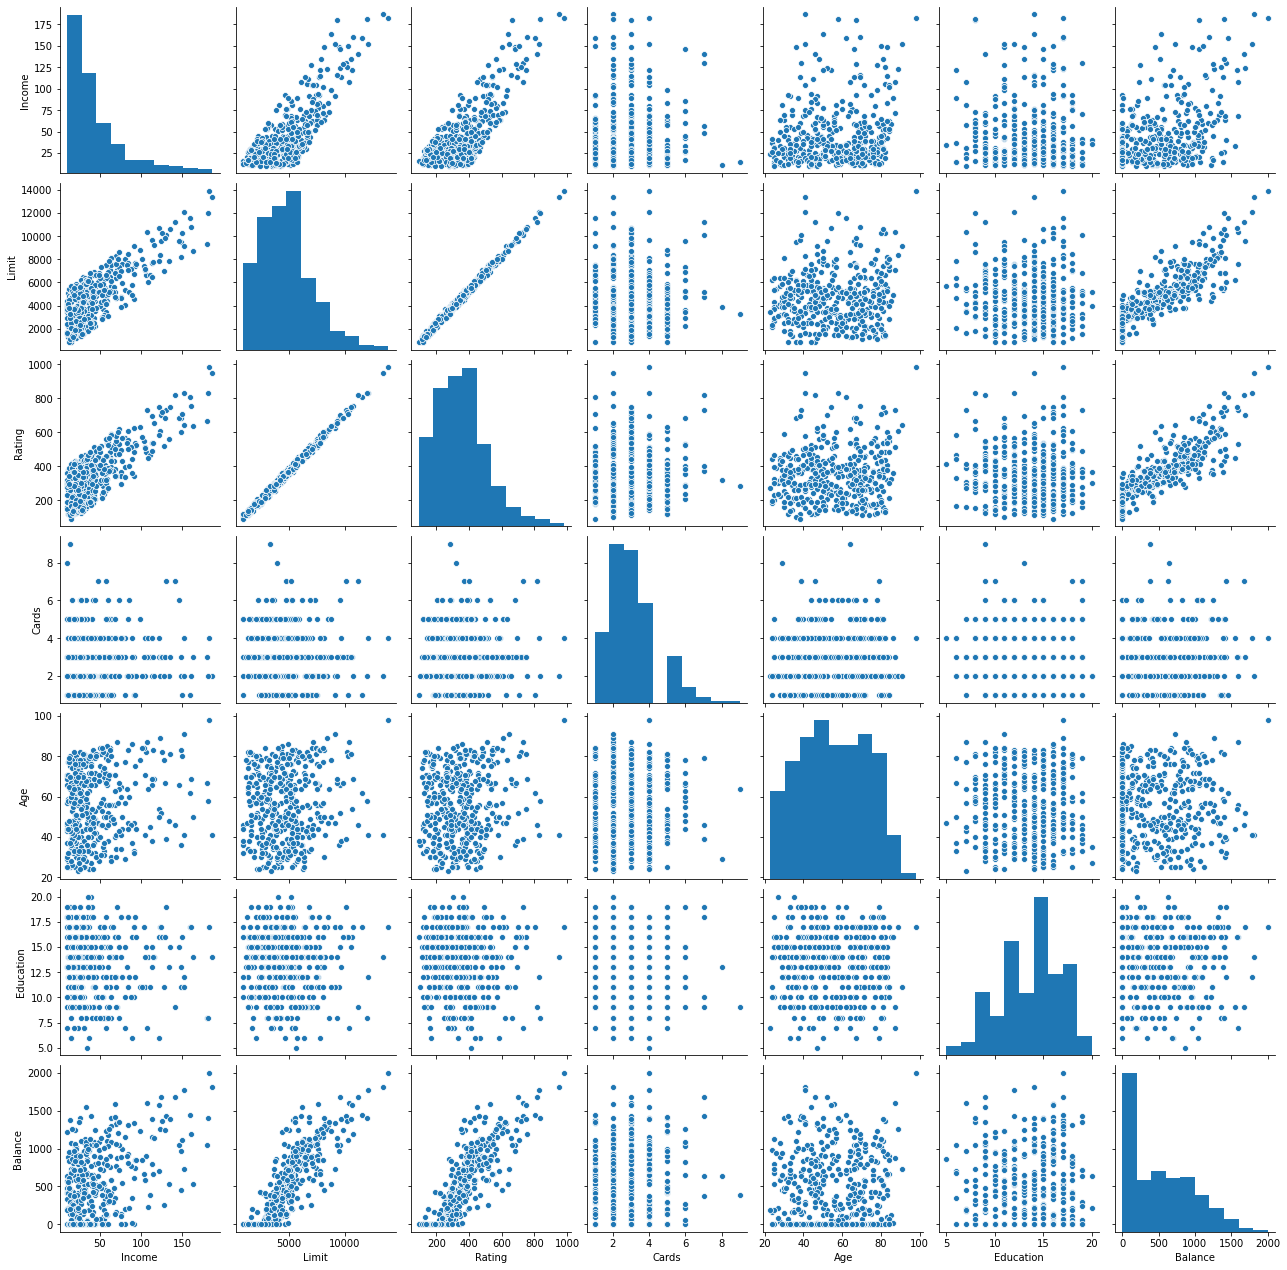

In [17]:
sns.pairplot(credit_data)
plt.show()

- Lets consider that the $Y = \beta_0+\beta_1X_1+\beta_2X_2+\epsilon$

- We want to capture the relationship between balance age and income and gender.
- This can be denoted by,

  $balance = \beta_0+\beta_1\times Age+\beta_2\times Income+\beta_3\times Gender$
- We want to capture the gender here. However we know that its a qualitative varaible and not a quantitative variable.

**How to use the qualitative variables in regression line**

- Inorder to use qualitative variables with the regression line along with qualitative variables,we can use dummy variables.


**Example:**

- Investigate the differences in credit card balance between males and females, ignoring other predictors. We create a new variable,

  $x_i = \begin{cases}
  1, &\text{if $i$th person is female}\\
  0, &\text{if $i$th person is male}
  \end{cases}$

- Resulting model:

  $y_i = \beta_0+\beta_1x_i+\epsilon = 
  \begin{cases}
  \beta_0+\beta_1+\epsilon_i, &\text{if $i$th person is female}\\
  \beta_0+\epsilon_i, &\text{if $i$th person is male}
  \end{cases}$

- In this way we can use qualitative variables in our quantitative lines.

- Lets take another example,

   $\text{balance} = \beta_0+\beta_1\times\text{Income}+\beta_2\times\text{Gender}$

   where,

   $ \text{Gender} = \begin{cases}
   1, &\text{Female}\\
   0, &\text{Male}
   \end{cases}$

- $\text{Balance}(\text{Income},\text{Male}) = \beta_0+\beta_1\times\text{Income}$
- $\text{Balance}(\text{Income},\text{Female}) = \beta_0+\beta_1\times\text{Income}+\beta_2$
- $\text{Balance}(\text{Female})-\text{Balance}(\text{Male}) = \beta_2 $

In [18]:
credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [0]:
new_credit_data = pd.concat([credit_data,pd.get_dummies(credit_data.Gender).drop(' Male',1)],axis=1).drop('Gender',1)
new_credit_data.rename(columns={' Female':'Female'},inplace=True)

In [20]:
model = ols('Balance ~ Female',new_credit_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Fri, 24 Apr 2020   Prob (F-statistic):              0.669
Time:                        13:57:58   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.0

**Observation:**
- The p-value is insignificant.

**Qualitative Predictors with more than two levels**

- With more than two levels, we create additional dummy variables.
- If we have $n$ categorical variables, then we must define $n-1$ dummy variables.

**Example:**

- For the ethinicity variable, we create two dummy variables. The first could be,

  $x_{i1} = \begin{cases}
  1, &\text{if $i$th person is Asian}\\
  0, &\text{if $i$th person is Not Asian}
  \end{cases}$

  and the second could be,

  $x_{i2} = \begin{cases}
  1, &\text{if $i$th person is Caucasian}\\
  0, &\text{if $i$th person is Not Caucasian}
  \end{cases}$

- Then both of these variables can be used in a regression equation, inorder to obtain the model

  $y_i = \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon = \begin{cases}
  \beta_0+\beta_1+\epsilon_i, &\text{if $i$th person is Asian}\\
  \beta_0+\beta_2+\epsilon_i, &\text{if $i$th person is Caucasian}\\
  \beta_0+\epsilon_i, &\text{if $i$th person is African American}
  \end{cases}$

- There will always be one fewer dummy variable than the number of levels. The level with no dummy variable -  African American in this example - is known as the baseline.

In [21]:
model = ols('Balance ~ Ethnicity',credit_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Fri, 24 Apr 2020   Prob (F-statistic):              0.957
Time:                        13:57:58   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531

**Observation**
- The p-values are insignificant.

**Extensions of Linear Model**

Removing the additive assumptions: ***interactions*** and ***non-linearity***

**Interactions**
- In our previous analysis of Advertising data, we assumed that the effect of sales of increasing one advertising medium is independant of the amount spent on other media.
- For example,the linear model,

  $\hat{sales} = \beta_0+\beta_1\times\text{TV}+\beta_2\times\text{Radio}+\beta_3\times\text{Newspaper}$

  states that the average effect of sales of one unit increase in TV is always $\beta_1$,regardless the amount spent on radio
- But suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope of the TV should increase as the radio increases.
- In this situation, given the fixed budget of $100,000, spending half on radio and half on TV may increase the sales more than allocating the entire amount to Radio or TV.
- In Marketing, this is known as the synergy effect, and in statistics this is refered to as an interaction effect.

**Modelling Interactions- Advertising Data**

- Model takes the form

  $\text{sales} = \beta_0+\beta_1\times\text{TV}+\beta_2\times\text{Radio}+\beta_3\times\text{Radio}\times\text{TV}+\epsilon$

In [22]:
model = ols('Sales ~ TV+Radio+TV:Radio',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          6.68e-146
Time:                        13:57:59   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

**Observation:**
- The results in the table suggests that the interactions are important.
- The p-value for the interaction term $\text{Radio}\times\text{TV}$ is extremely low, indicating that there is a strong evidence for $H_A:\beta_3\ne0$.
- The $R^2$ for the interaction model is 96.8%, compared to the 89.7% for the model that predicts sales using TV and radio without an interaction term.
- This means that (96.8-89.7)/(100-89.7) = 69% of the variability in sales that remains after fitting the additive model has been explained by the interaction term.
- The coefficient in the table suggests that an increase in TV Advertising by $1000 is associated with increased sales of 

  $(\hat\beta_1+\hat\beta_3\times\text{Radio})\times1000 = 19+1.1\times\text{Radio units}$
- An increase in radio advertising of $1,000 will be associated with an increase in the sale of

  $(\hat\beta_2+\hat\beta_3\times\text{TV})\times1000 = 29+1.1\times\text{TV units}$

**Hierarchy**

- Sometimes it is the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and Radio) do not.
- *If we include the interaction in a model, we should also include the main effects, even if the p-values associated with their coeffiecients are not significant*
- The Rationale for this priciple is that interactions are hard. To interpret a model without its main effects - their meaning is changed.
- Specifically, the interaction term also contains the main effects, if the model has no main effect terms.

**Interaction between Qualitative and Quantitative Variables**

- Consider the credit dataset, and suppose that we wish to predict balance using income(quantitative) and student(qualitative)
- Without an interaction the model takes the form,

  $\text{balance}_i \approx \beta_0+\beta_1\times\text{income}_i+\begin{cases}
  \beta_2, &\text{if $i$th person is a Student}\\
  0, &\text{if $i$th person is not a Student}
  \end{cases}$

  $\text{balance}_i = \beta_1\times\text{income}+\begin{cases}
  \beta_0+\beta_2, &\text{if $i$th person is a student}\\
  \beta_0, &\text{if $i$th person is not a student}
  \end{cases}$
- With interaction it takes the form,

  $\text{balance}_i\approx \beta_0+\beta_1\times\text{income}_i+\begin{cases}
  \beta_2+\beta_3\times\text{income}_i, &\text{if Student}\\
  0, &\text{if not Student}
  \end{cases}$

  $\text{balance}_i = \begin{cases}
  (\beta_0+\beta_2)+(\beta_1+\beta_3)\times\text{income}_i, &\text{if Student}\\
  \beta_0+\beta_1\times\text{income}_i, &\text{if not Student}
  \end{cases}$

In [23]:
credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [24]:
model = ols(' Balance ~ Income+Student+Income:Student',credit_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           4.94e-28
Time:                        13:57:59   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.62

In [0]:
not_student = credit_data[credit_data['Student']=='No'][['Income','Student']]
student = credit_data[credit_data['Student']=='Yes'][['Income','Student']]

In [0]:
student_pred = model.predict(student)

In [0]:
not_student_pred = model.predict(not_student)

In [0]:
model_without_interaction = ols(' Balance ~ Income+Student',credit_data).fit()

In [0]:
mi_student_pred = model_without_interaction.predict(student)
mi_not_student_pred = model_without_interaction.predict(not_student)

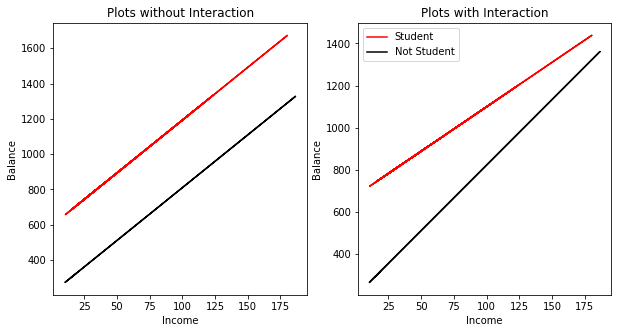

In [30]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

#plots without Interaction
ax[0].plot(student.Income,mi_student_pred,c='r')
ax[0].plot(not_student.Income,mi_not_student_pred,c='black')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Balance')
ax[0].set_title('Plots without Interaction')

#plots with Interaction
ax[1].plot(student.Income,student_pred,c='r',label='Student')
ax[1].plot(not_student.Income,not_student_pred,c='black',label='Not Student')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Balance')
ax[1].legend(loc='best')
ax[1].set_title('Plots with Interaction')

plt.show()

**Non Linear Effects of Predictors**